<a href="https://colab.research.google.com/github/adarithanmayee26/churn_modeling/blob/main/churn_modeling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [30]:
df = pd.read_csv("/content/sample_data/Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
df.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [33]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [34]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)


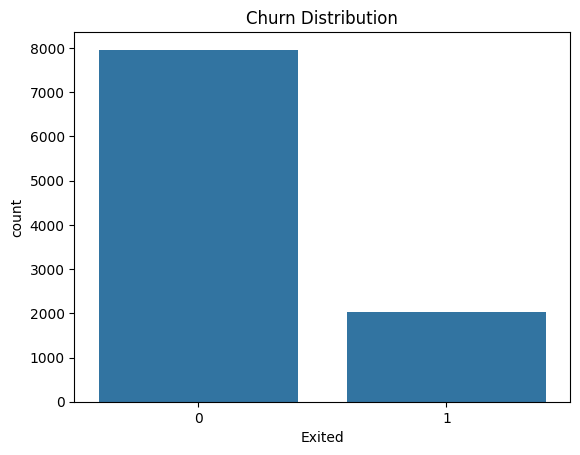

In [35]:
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution")
plt.show()


In [36]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


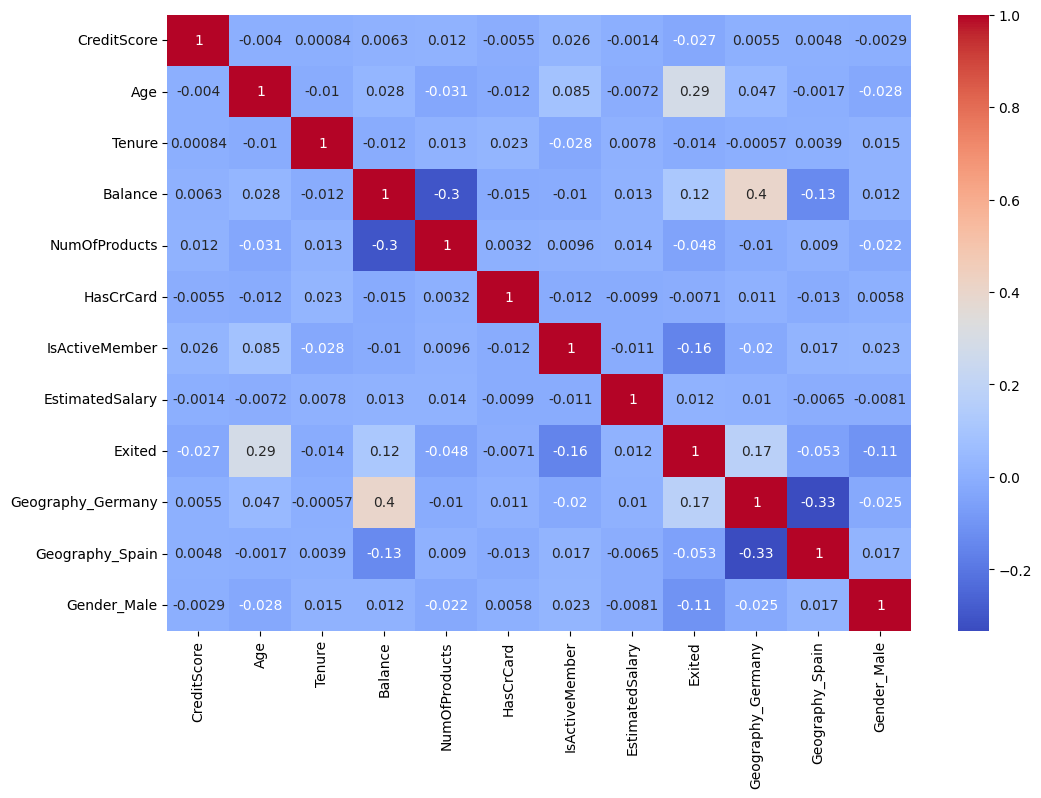

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [38]:
X = df.drop("Exited", axis=1)
y = df["Exited"]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [40]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [41]:
y_pred = dt.predict(X_test)


In [42]:



accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7805


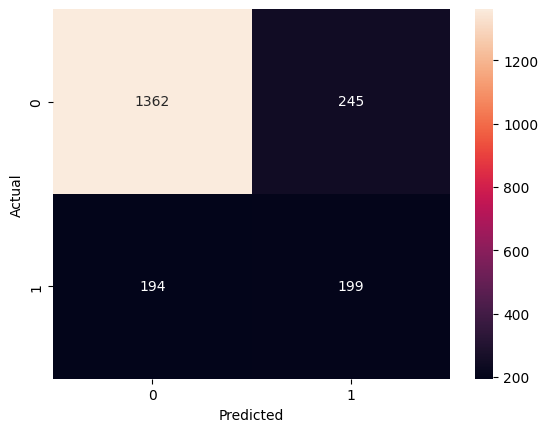

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [44]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000



In [45]:
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("New Accuracy:", accuracy_score(y_test, y_pred))


New Accuracy: 0.858


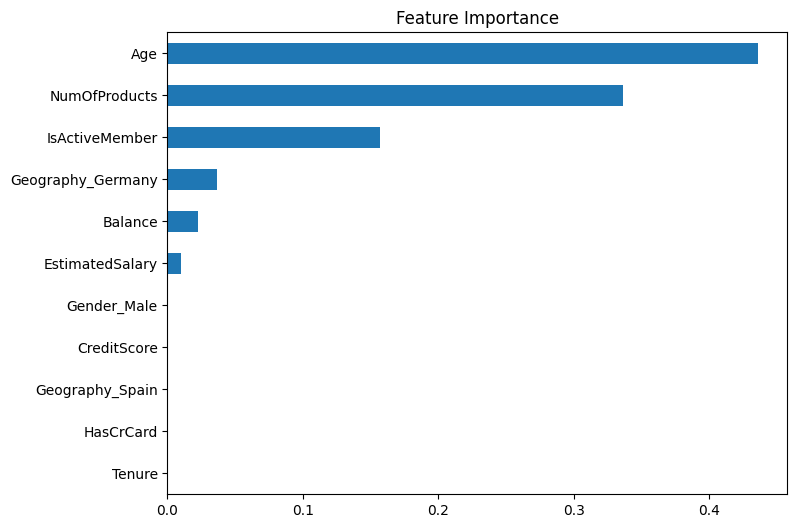

In [46]:
importance = pd.Series(dt.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best CV Score: 0.8550000000000001


In [48]:
best_dt = grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.861


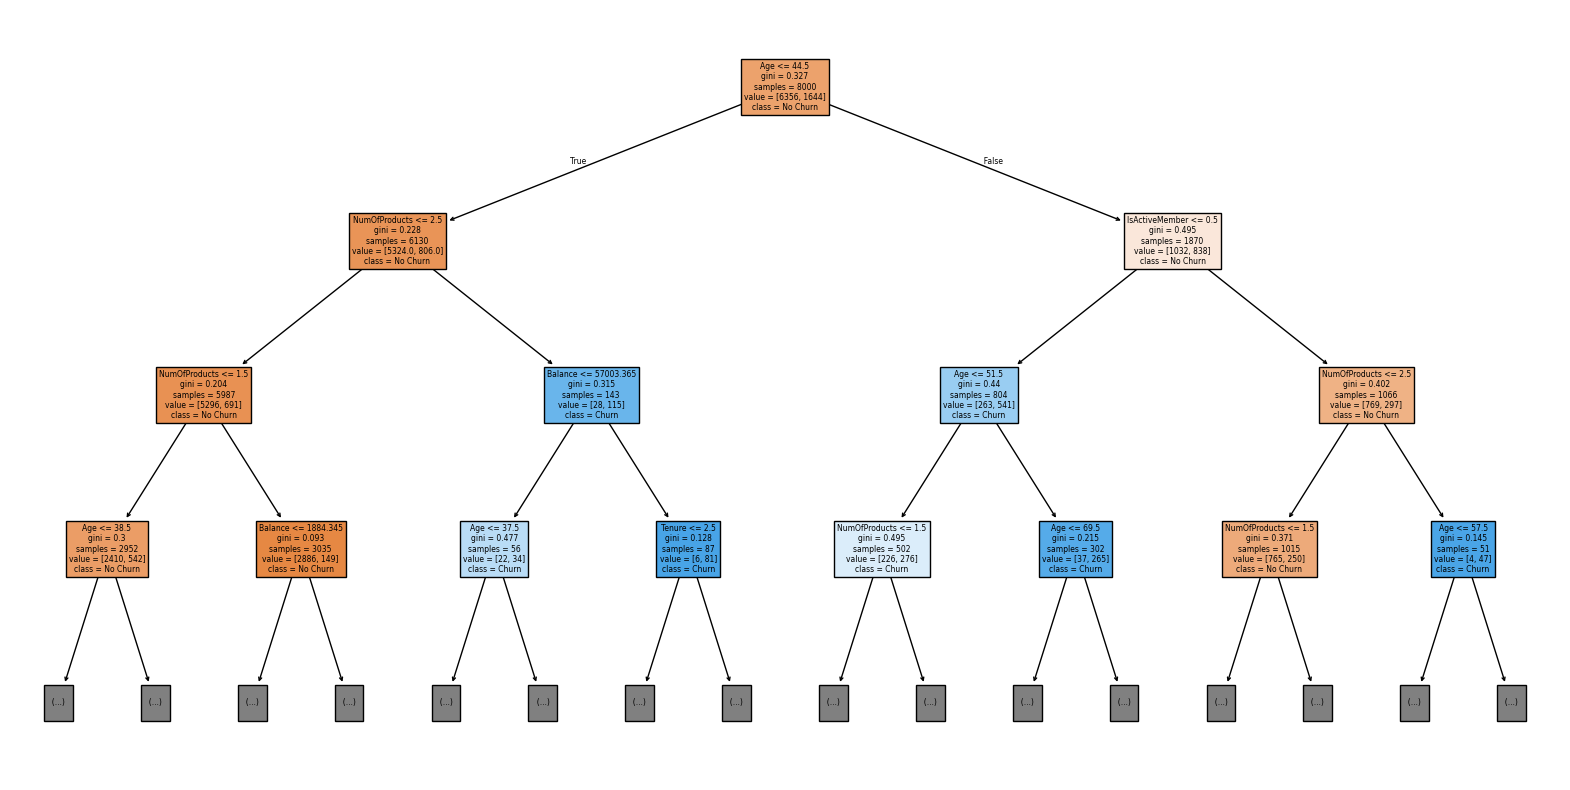

In [49]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_dt,
          feature_names=X.columns,
          class_names=['No Churn','Churn'],
          filled=True,
          max_depth=3)   # limit depth for clarity
plt.show()


In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8705


In [51]:
print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_dt))

print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))


Decision Tree Accuracy: 0.861
Random Forest Accuracy: 0.8705


In [52]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)


In [53]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))


Tuned Random Forest Accuracy: 0.866


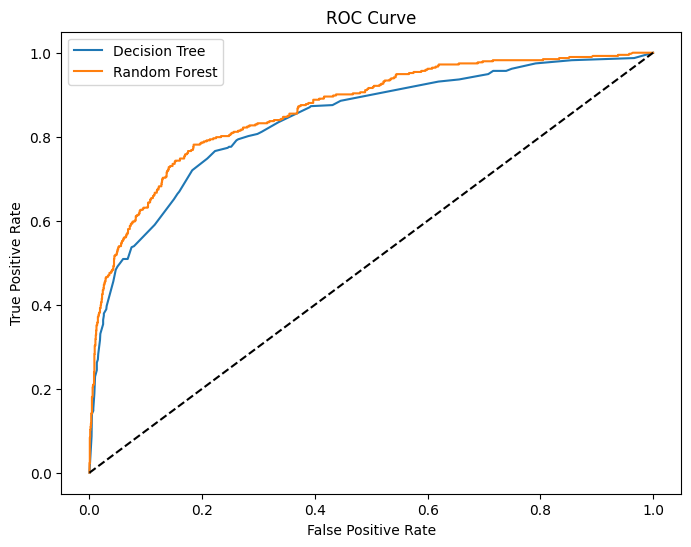

DT AUC: 0.8373155928816517
RF AUC: 0.8653386662359809


In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities
dt_probs = best_dt.predict_proba(X_test)[:,1]
rf_probs = best_rf.predict_proba(X_test)[:,1]

# ROC values
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(8,6))
plt.plot(dt_fpr, dt_tpr, label="Decision Tree")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("DT AUC:", roc_auc_score(y_test, dt_probs))
print("RF AUC:", roc_auc_score(y_test, rf_probs))


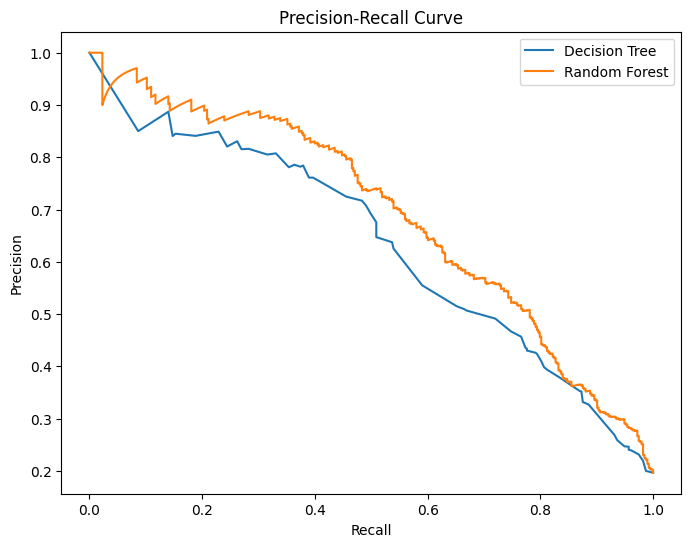

In [55]:
from sklearn.metrics import precision_recall_curve

dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)

plt.figure(figsize=(8,6))
plt.plot(dt_recall, dt_precision, label="Decision Tree")
plt.plot(rf_recall, rf_precision, label="Random Forest")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


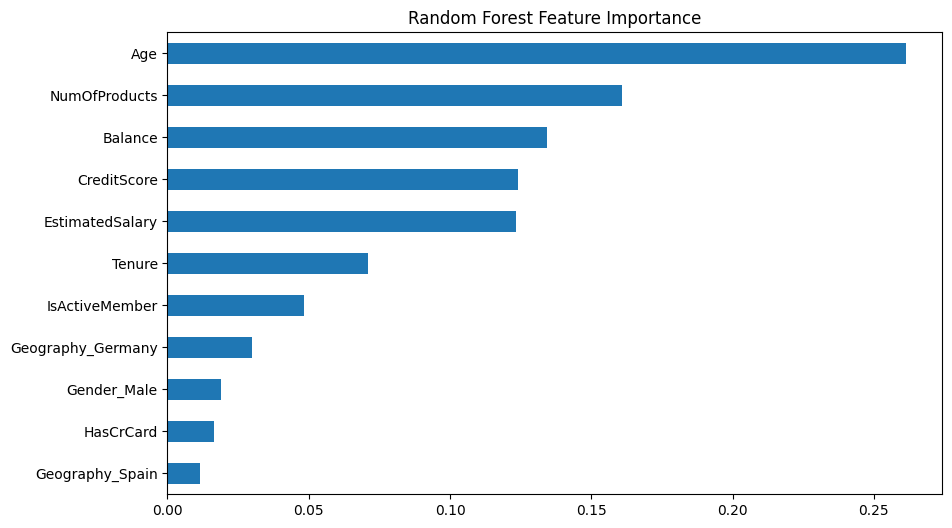

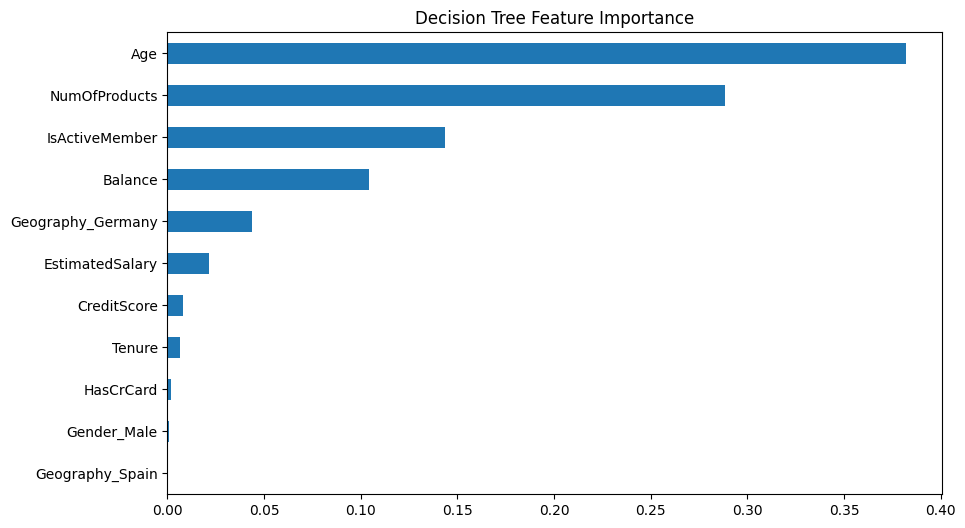

In [56]:
dt_importance = pd.Series(best_dt.feature_importances_, index=X.columns)
rf_importance = pd.Series(best_rf.feature_importances_, index=X.columns)

plt.figure(figsize=(10,6))
rf_importance.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

plt.figure(figsize=(10,6))
dt_importance.sort_values().plot(kind='barh')
plt.title("Decision Tree Feature Importance")
plt.show()


In [57]:
pip install imbalanced-learn


In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())


Before SMOTE: Exited
0    6356
1    1644
Name: count, dtype: int64
After SMOTE: Exited
0    6356
1    6356
Name: count, dtype: int64


In [59]:
rf_sm = RandomForestClassifier(n_estimators=300, random_state=42)

rf_sm.fit(X_train_sm, y_train_sm)

y_pred_rf_sm = rf_sm.predict(X_test)

print("Accuracy after SMOTE:",
      accuracy_score(y_test, y_pred_rf_sm))


Accuracy after SMOTE: 0.835


In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
print(cm)


[[1543   64]
 [ 204  189]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [62]:
rf_probs = best_rf.predict_proba(X_test)[:,1]

# Set custom threshold
threshold = 0.3

y_pred_custom = (rf_probs >= threshold).astype(int)

print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1607
           1       0.57      0.68      0.62       393

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000



In [63]:
import numpy as np
from sklearn.metrics import recall_score

thresholds = np.arange(0.1, 0.9, 0.05)

for t in thresholds:
    y_pred_temp = (rf_probs >= t).astype(int)
    recall = recall_score(y_test, y_pred_temp)
    print("Threshold:", t, "Recall:", recall)


Threshold: 0.1 Recall: 0.9007633587786259
Threshold: 0.15000000000000002 Recall: 0.8396946564885496
Threshold: 0.20000000000000004 Recall: 0.7989821882951654
Threshold: 0.25000000000000006 Recall: 0.7480916030534351
Threshold: 0.30000000000000004 Recall: 0.6768447837150128
Threshold: 0.3500000000000001 Recall: 0.6132315521628499
Threshold: 0.40000000000000013 Recall: 0.5597964376590331
Threshold: 0.45000000000000007 Recall: 0.5267175572519084
Threshold: 0.5000000000000001 Recall: 0.48091603053435117
Threshold: 0.5500000000000002 Recall: 0.44783715012722647
Threshold: 0.6000000000000002 Recall: 0.3969465648854962
Threshold: 0.6500000000000001 Recall: 0.35368956743002544
Threshold: 0.7000000000000002 Recall: 0.2951653944020356
Threshold: 0.7500000000000002 Recall: 0.2544529262086514
Threshold: 0.8000000000000002 Recall: 0.1806615776081425
Threshold: 0.8500000000000002 Recall: 0.11195928753180662


In [64]:
X_train_sm

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,686,32,6,0.000000,2,1,1,179093.260000,False,False,True
1,632,42,4,119624.600000,2,1,1,195978.860000,True,False,True
2,559,24,3,114739.920000,1,1,0,85891.020000,False,True,True
3,561,27,9,135637.000000,1,1,0,153080.400000,False,False,False
4,517,56,9,142147.320000,1,0,0,39488.040000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
12707,747,47,6,133415.111263,1,0,1,3409.082623,True,False,True
12708,730,43,8,0.000000,1,0,0,199220.081437,False,True,True
12709,769,32,2,0.000000,1,1,0,193872.703755,False,True,True
12710,648,56,7,110599.540192,1,0,0,134673.548272,True,False,True


In [65]:
import joblib

joblib.dump(best_rf, 'random_forest_model.joblib')
print("Random Forest model saved as random_forest_model.joblib")

Random Forest model saved as random_forest_model.joblib
